<a href="https://colab.research.google.com/github/luai596/fscq/blob/master/Financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Needed *Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
py.init_notebook_mode(connected=True)
import warnings 
warnings.simplefilter('ignore')

# Reading the datset

In [100]:
#read train data set
train = pd.read_csv("Train_v2.csv")

In [101]:
#read test data set
test = pd.read_csv("Test_v2.csv")

In [ ]:
#read submission file
sub=pd.read_csv("SubmissionFile")

In [ ]:
#read VariableDefinitions
var=pd.read_csv("VariableDefinitions")

# information about training Dataset

In [5]:
#disply training set informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
#disply sum of null values for each feature
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
#Display the  sum Null Values(if exisit)  in Train Dataset for each feature
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
#Display the  sum Null Values(if exisit)  in Test Dataset for each feature
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
# count number of  training individuals for some african countries{Kenya, Rwanda, Tanzania and Uganda}
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [10]:
#displaying rows of training data 
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [103]:
#number of columns,rows
train.shape

(23524, 13)

In [105]:
#drop a row if any value is missing 
train.dropna(how='any').shape

(23524, 13)

# **Preprocessing of Data**

In [11]:
#convert cellphone_access feature from categorical to numeric values
# convert location_type feature from catgorical to numeric values
def preprocess_data(data) :
    dic1 = {"Yes" : 1 , "No" : 0} 
    dic2 = {"Rural" : 0 , "Urban" : 1} 
    data["location_type"]=data["location_type"].map(dic2) 
    data["cellphone_access"]=data["cellphone_access"].map(dic1)
    one_hot = pd.get_dummies(data["gender_of_respondent"])
    data = data.drop("gender_of_respondent",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["country"])
    data = data.drop("country",axis=1)
    data = data.join(one_hot)
    le = LabelEncoder()
    data['relationship_with_head']=le.fit_transform(data['relationship_with_head'])
    data['marital_status']=le.fit_transform(data["marital_status"])
    data['education_level']=le.fit_transform(data["education_level"])
    data['job_type']=le.fit_transform(data['job_type'])
    data = data.drop('uniqueid',axis=1)
    data.loc[ data['age_of_respondent'] <= 16, 'age_of_respondent']   = 0
    data.loc[(data['age_of_respondent'] > 16) & (data['age_of_respondent'] <= 32), 'age_of_respondent'] = 1
    data.loc[(data['age_of_respondent'] > 32) & (data['age_of_respondent'] <= 48), 'age_of_respondent'] = 2
    data.loc[(data['age_of_respondent'] > 48) & (data['age_of_respondent'] <= 64), 'age_of_respondent'] = 3
    data.loc[ data['age_of_respondent'] > 64, 'age_of_respondent'] = 4
    return data

In [12]:
train.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [14]:
#preprocessing the data
def preprocess_data2(data) :
    dic1 = {"Yes" : 1 , "No" : 0}
    dic2 = {"Rural" : 0 , "Urban" : 1}
    data["location_type"]=data["location_type"].map(dic2)
    data["cellphone_access"]=data["cellphone_access"].map(dic1)
    one_hot = pd.get_dummies(data["gender_of_respondent"])
    data = data.drop("gender_of_respondent",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["country"])
    data = data.drop("country",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["relationship_with_head"])
    data = data.drop("relationship_with_head",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["marital_status"])
    data = data.drop("marital_status",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["education_level"])
    data = data.drop("education_level",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["job_type"])
    data = data.drop("job_type",axis=1)
    data = data.join(one_hot)
    data = data.drop('uniqueid',axis=1)
    data.loc[ data['age_of_respondent'] <= 16, 'age_of_respondent']   = 0
    data.loc[(data['age_of_respondent'] > 16) & (data['age_of_respondent'] <= 32), 'age_of_respondent'] = 1
    data.loc[(data['age_of_respondent'] > 32) & (data['age_of_respondent'] <= 48), 'age_of_respondent'] = 2
    data.loc[(data['age_of_respondent'] > 48) & (data['age_of_respondent'] <= 64), 'age_of_respondent'] = 3
    data.loc[ data['age_of_respondent'] > 64, 'age_of_respondent'] = 4
    return data

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [16]:
def feature_engineering(data) :
    data['Has_Education'] = data["education_level"].apply(
    lambda x: 1 if x=='Primary education' or x=='Secondary education' or x=='Tertiary education'     else 0)
    return data

In [17]:
def feature_engineering2 (data) :
    data['works_for_gov'] = data["job_type"].apply(
    lambda x: 1 if x=='Formally employed Government' or x=='Government Dependent'  else 0)
    return data

# **Data cleaning**

In [18]:
#define fuction cleaning_marital_status
def cleaning_marital_status(data) : 
    train_wrong=data.loc[(data["household_size"]==1) & (data['marital_status']=='Married/Living together') ]
    data= pd.concat([data,train_wrong,train_wrong]).drop_duplicates(keep=False)
    return data

In [19]:
#assigning feature engineering  and cleaining and preprocessing to  train_cleaned
train_cleaned = feature_engineering(train)
train_cleaned = feature_engineering2(train_cleaned)
train_cleaned = cleaning_marital_status(train_cleaned)
train_cleaned = preprocess_data(train_cleaned)
train_cleaned.head() # display train_cleaned

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov,Female,Male,Kenya,Rwanda,Tanzania,Uganda
0,2018,Yes,0,1,3,1,5,2,3,9,1,0,1,0,1,0,0,0
1,2018,No,0,0,5,4,1,4,0,4,0,1,1,0,1,0,0,0
2,2018,Yes,1,1,5,1,3,3,5,9,0,0,0,1,1,0,0,0
3,2018,No,0,1,5,2,1,2,2,3,1,0,1,0,1,0,0,0
4,2018,No,1,0,8,1,0,3,2,5,1,0,0,1,1,0,0,0


In [20]:
#assign preprocess_data2 to train_cleaned2
train_cleaned2 = preprocess_data2(train)


In [21]:
#convert catigorical values to numeric value of feature bank_account
dic1 = {"Yes" : 1 , "No" : 0}
train_cleaned["bank_account"]=train_cleaned["bank_account"].map(dic1) #asign after mapping

In [22]:
train_cleaned2["bank_account"]=train_cleaned2["bank_account"].map(dic1) #asign after mapping


In [23]:
train_cleaned2.head() # display again to ensure no null values in data


,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,Has_Education,works_for_gov,Female,Male,Kenya,Rwanda,Tanzania,Uganda,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,1,0,1,3,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,0,5,4,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,1,1,5,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,0,0,1,5,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,0,1,0,8,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
#feature engineering and cleaning and preproccing  
test_cleaned = feature_engineering(test)
test_cleaned = feature_engineering2(test_cleaned)
test_cleaned = cleaning_marital_status(test_cleaned)
test_cleaned = preprocess_data(test)
test_cleaned.head() #display test_cleaned

,year,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov,Female,Male,Kenya,Rwanda,Tanzania,Uganda
0,2018,1,1,3,1,1,2,3,2,1,1,0,1,1,0,0,0
1,2018,1,1,7,3,1,2,5,3,0,0,0,1,1,0,0,0
2,2018,0,0,3,4,4,2,0,8,0,0,1,0,1,0,0,0
3,2018,0,0,6,2,1,2,2,8,1,0,1,0,1,0,0,0
4,2018,1,0,3,0,0,3,3,8,1,0,0,1,1,0,0,0


In [25]:
#test_cleaned2 = preprocess_data2(test)
#test_cleaned2.head()

# **Manually preproccing data**

manual convert feature to numeric values


In [26]:
dic3 = {"Kenya" : 3 , "Rwanda" : 2 , "Tanzania" : 1  , "Uganda" : 0 }
dic4 = {"Primary education" : 5, "Secondary education" : 4 ,"Tertiary education" :  3,"Vocational/Specialised training" :2,"No formal education" :1 ,"Other/Dont know/RTA" : 0}
dic5 = {"Married/Living together" : 4,"Single/Never Married" :3,"Widowed":2 ,"Divorced/Seperated" :1 ,"Dont know" : 0}
dic6 = {"Head of Household":5,"Spouse":4,"Child":3,"Other relative":2,"Parent":1,"Other non-relatives":0}
dic7 = {"Self employed":9,"Farming and Fishing":8,"Formally employed Private":7,"Informally employed":6,"Formally employed Government":5,"Remittance Dependent":4,"Other Income":3,"Government Dependent":2,"Dont Know/Refuse to answer":1,"No Income":0}

In [27]:
train['country']=train['country'].map(dic3)
train['education_level']=train['education_level'].map(dic4)
train['marital_status']=train['marital_status'].map(dic5)
train['relationship_with_head'] = train['relationship_with_head'].map(dic6)
train['job_type']=train['job_type'].map(dic7)

In [28]:
test['country']=test['country'].map(dic3)
test['education_level']=test['education_level'].map(dic4)
test['marital_status']=test['marital_status'].map(dic5)
test['relationship_with_head'] = test['relationship_with_head'].map(dic6)
test['job_type']=test['job_type'].map(dic7)

## visualization and plotting explore the features  showing the statistics/correlations

In [29]:
#define plot_correlation_map fuction
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 175, 20 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
        )

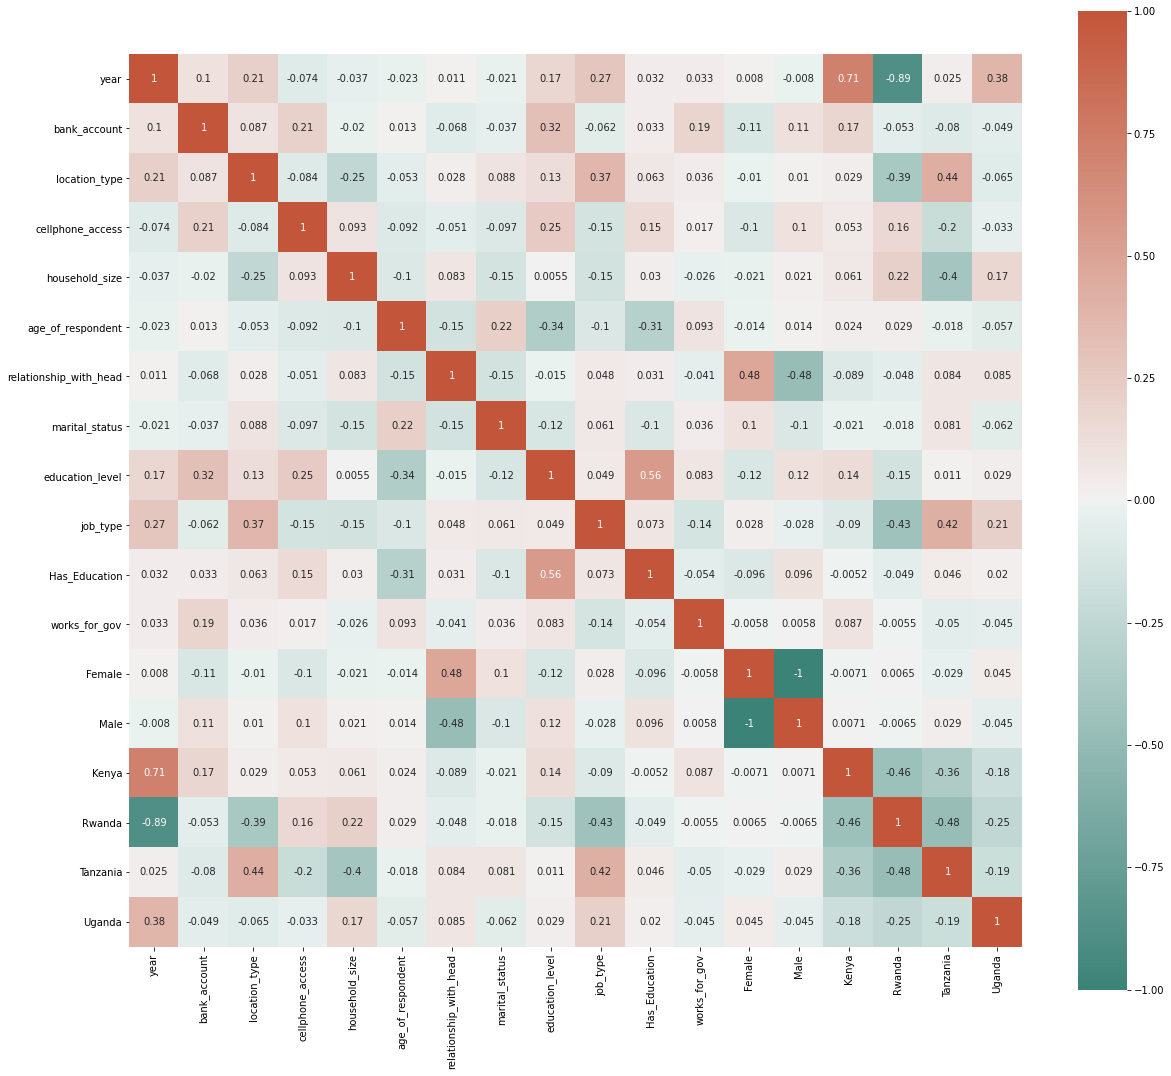

In [30]:
#plotting clean train and  the correlations 
plot_correlation_map(train_cleaned)


# Splitting DATA

In [31]:
#splitting Data 30/70
X= train_cleaned[["year","location_type","cellphone_access","household_size","age_of_respondent","relationship_with_head","marital_status","education_level","job_type","Female","Male","Kenya","Tanzania","Rwanda","Uganda","Has_Education","works_for_gov"]]
y=train_cleaned["bank_account"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [32]:
#splitting Data 20/80

X_train, X_test, y_train, y_test = train_test_split(
    train_cleaned2.drop(columns=["bank_account"]),
    train_cleaned2["bank_account"],
    test_size=0.2, 
    random_state=20)

In [33]:
#display number of rows and columns
train.shape

(23524, 15)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  int64 
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
 13  Has_Education           23524 non-null  int64 
 14  works_for_gov           23524 non-null  int64 
dtypes:

In [35]:
train.isna()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
train.isnull()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov
0,3,2018,uniqueid_1,Yes,0,1,3,24,Female,4,4,4,9,1,0
1,3,2018,uniqueid_2,No,0,0,5,70,Female,5,2,1,2,0,1
2,3,2018,uniqueid_3,Yes,1,1,5,26,Male,2,3,2,9,0,0
3,3,2018,uniqueid_4,No,0,1,5,34,Female,5,4,5,7,1,0
4,3,2018,uniqueid_5,No,1,0,8,26,Male,3,3,5,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0,2018,uniqueid_2113,No,0,1,4,48,Female,5,1,1,3,0,0
23520,0,2018,uniqueid_2114,No,0,1,2,27,Female,5,3,4,3,1,0
23521,0,2018,uniqueid_2115,No,0,1,5,27,Female,1,2,5,3,1,0
23522,0,2018,uniqueid_2116,No,1,1,7,30,Female,1,1,4,9,1,0


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  int64 
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  int64 
 13  Has_Education           23524 non-null  int64 
 14  works_for_gov           23524 non-null  int64 
dtypes:

In [39]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
Has_Education             0
works_for_gov             0
dtype: int64

In [40]:
train.isnull()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **Support Vector Machines**

In [41]:
#import SVC from sklearn svm
from sklearn.svm import SVC


In [42]:
#create 3 types of kernel 
kernal=['linear','rbf','poly']
for i in kernal:
    model1=SVC(kernel=i,C=1.0) 
    model1.fit(X_train,y_train) #fitting train dataset 
    print(['For kernal:',i])
    print('Accuracy is :',model1.score(X_test,y_test))# accuracy of kernel types

['For kernal:', 'linear']
Accuracy is : 0.8743889479277365
['For kernal:', 'rbf']
Accuracy is : 0.8578108395324123
['For kernal:', 'poly']
Accuracy is : 0.8578108395324123


In [43]:
#fitting and output the Accuracy on training and testing
model1=SVC()
model1.fit(X_train,y_train)
print('Accuracy on testing data is',model1.score(X_test,y_test))
print('Accuracy on training data is',model1.score(X_train,y_train))


Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263


In [44]:
#loop with kernel=poly with diff degree and C=100 and notice Accuracy on testing and training
for i in range(1,10):
    model1=SVC(kernel='poly',degree=i,C=100)
    model1.fit(X_train,y_train)
    print('Accuracy on testing data is',model1.score(X_test,y_test))
    print('Accuracy on training data is',model1.score(X_train,y_train))


Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263
Accuracy on testing data is 0.8578108395324123
Accuracy on training data is 0.8595568308624263


In [45]:
#To chech which is best hyperparameter(with SVM)=>> use GradsearchCV
from sklearn.model_selection import GridSearchCV
parm_grid={'C':[0.1,1,100,1000],'kernel':['rbf','lin','poly'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),parm_grid)
grid.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'lin', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
#print the best hyperparameter
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.1, 'degree': 1, 'kernel': 'rbf'}
0.8578108395324123


# **Naive Bayes Classification**

In [ ]:
#scaling using StandardScaler
from sklearn.preprocessing import StandardScaler # import StandardScaler 
sc=StandardScaler() #define Standard Scaler
X_train=sc.fit_transform(X_train)# transform train data
X_test=sc.fit_transform(X_test) # transform test data

In [ ]:
#import naive bayes (GaussianNB) and fitting data
from sklearn.naive_bayes import GaussianNB #import GaussianNB naive bayes model
classifier=GaussianNB() # create GaussianNB classifier
classifier.fit(X_train,y_train) #train the model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predicte output 
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

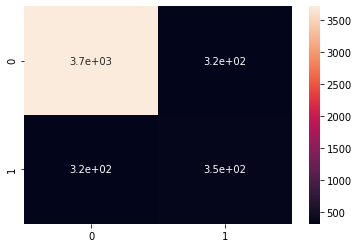

In [ ]:
#plotting heatmap of confusion_matrix
sns.heatmap(cm,annot=True)


In [ ]:
#compute accuracy
from sklearn.metrics import accuracy_score # import accuracy_score
accuracy_score(y_test,y_pred) #display accuracy

0.8641870350690755

# **Logistic Regression**

In [ ]:
#importing LogisticRegression and scaling and predicting and compute accuracy
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # create LogisticRegression classifier
scaler = StandardScaler() #define Standard Scaler
X_train_scaled = scaler.fit_transform(X_train) #transform train data
X_test_scaled = scaler.transform(X_test) #transform test data
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy = {:.2f}'.format(logreg.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4036
           1       0.72      0.35      0.47       669

    accuracy                           0.89      4705
   macro avg       0.81      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705

Accuracy = 0.89


Evaluate a score by cross-validation



In [ ]:
#importing model_selection & cross_val_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.884


# **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier
from sklearn.metrics import accuracy_score# import accuracy_score
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train) # fitting training data in KNeighborsClassifier
y_pred = knn.predict(X_test) #compute predicted value (y_pred)
print("Accuracy = ",accuracy_score(y_pred,y_test)) #output the accuracy

Accuracy =  0.8888416578108396


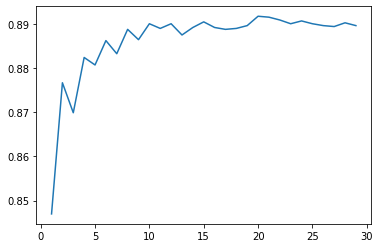

In [ ]:
#import KNeighborsClassifier & accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores=[]
k_range= range(1,30) #choose range from 1:30
for i in k_range :
    knn = KNeighborsClassifier(n_neighbors=i) #Build KNeighborsClassifier with n_neighbors=i
    knn.fit(X_train, y_train) #fitting train data 
    y_pred = knn.predict(X_test) #compute predicted value 
    scores.append(accuracy_score(y_pred,y_test)) #compute score (accuracy_score)
plt.plot(k_range,scores) # plotting k_range & scores

# RandomForestClassifier

In [ ]:
#use RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=350) #Build RandomForestClassifier with n_estimators=30
rfc = rfc.fit(X_train, y_train)#fitting train data 
rfc_pred = rfc.predict(X_test) #compute predict test with RandomForestClassifier
from sklearn.metrics import accuracy_score #import accuracy_score from sklearn
from sklearn.metrics import classification_report,confusion_matrix #classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred)) #print report of actual and testing result
print("accuracy = ",accuracy_score(rfc_pred,y_test)) # print ACCURACY


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4036
           1       0.59      0.40      0.48       669

    accuracy                           0.88      4705
   macro avg       0.75      0.68      0.70      4705
weighted avg       0.86      0.88      0.86      4705

accuracy =  0.8756641870350691


# Random Forest (use Grid search to find best parameters)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#using max_depth,criterion will suffice for DT models, rest all will remain costant
#given all paramters in Random forest
parameters={'n_estimators':(10,30,50,70,90,100)
            ,'criterion':('gini','entropy')
            ,'max_depth':(3,5,7,9,10)
            ,'max_features':('auto','sqrt')
            ,'min_samples_split':(2,4,6)}

In [ ]:
RF_grid=GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [ ]:
RF_grid_model=RF_grid.fit(x_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 11.8min finished


In [ ]:
RF_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
RF_grid_model.best_score_

0.8691118894167978

In [ ]:
#Build model with best estimator
RF_Model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
RF_Model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
#Evalution of Test
y_pred=RF_Model.predict(X_test)


In [ ]:
print ('Test:',RF_Model.score(X_test,y_test))
print ('Train:',RF_Model.score(x_train,y_train))

Test: 0.8595111583421892
Train: 0.8638411834721986


# **Build DecisionTreeClassifier**

In [ ]:
#import tree and fitting DecisionTreeClassifier
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)

In [ ]:
#import accuracy_score 
from sklearn.metrics import accuracy_score
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))
print("Accuracy = ",accuracy_score(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4036
           1       0.76      0.21      0.33       669

    accuracy                           0.88      4705
   macro avg       0.82      0.60      0.63      4705
weighted avg       0.86      0.88      0.85      4705

Accuracy =  0.8777895855472901


# **XGBOOST**

In [ ]:
# import xgboost 
import xgboost as xgb 
XGB= xgb.XGBClassifier() #applay XGBClassifier
XGB.fit(X_train,y_train)# fitting training dataset 
pred1=XGB.predict(X_test)# compute predicted value
print ('Accuracy ={:.2f}'.format(XGB.score(X_test,y_test)))# output Accuracy of test data with xgboost

Accuracy =0.89


# **GradientBoostingClassifier**

In [ ]:
#applay GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier #import GradientBoostingClassifier
# give values to learning_rates 
learning_rates = [0.05, 0.1,0.15,0.2, 0.25,0.3,0.35,0.4,0.45, 0.5,0.55,0.6,0.65,0.7, 0.75,0.8,0.85,0.9,0.95, 1,1.05,1.1,1.15,1.2,1.25]
#loop for learning_rates values
for learning_rate in learning_rates:
    #applay GradientBoostingClassifier with hyperparameters
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train) # fitting training data
    print("Learning rate: ", learning_rate)# output of learning_rate
    #output accuracy score :
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.860
Accuracy score (validation): 0.858

Learning rate:  0.1
Accuracy score (training): 0.860
Accuracy score (validation): 0.858

Learning rate:  0.15
Accuracy score (training): 0.869
Accuracy score (validation): 0.866

Learning rate:  0.2
Accuracy score (training): 0.873
Accuracy score (validation): 0.872

Learning rate:  0.25
Accuracy score (training): 0.878
Accuracy score (validation): 0.877

Learning rate:  0.3
Accuracy score (training): 0.880
Accuracy score (validation): 0.881

Learning rate:  0.35
Accuracy score (training): 0.881
Accuracy score (validation): 0.883

Learning rate:  0.4
Accuracy score (training): 0.881
Accuracy score (validation): 0.884

Learning rate:  0.45
Accuracy score (training): 0.882
Accuracy score (validation): 0.884

Learning rate:  0.5
Accuracy score (training): 0.882
Accuracy score (validation): 0.883

Learning rate:  0.55
Accuracy score (training): 0.882
Accuracy score (validation): 0.884

Learning rate: 

# EXTRA TREES CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=200)
etc = etc.fit(X_train,y_train)
etc.score(X_test,y_test)

0.8688629117959618

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada = ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)  
ada.score(X_test,y_test)

0.8869287991498406

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_test, y_test.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
clf.score(X_test,y_test)

0.8882040382571732

# **Bagging**

In [65]:
#import needed libraries 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



In [66]:
#Decision Tree Classifier & fitting in training dataset
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
#accuracy with test data set
dt.score(X_test,y_test)

0.859086078639745

In [68]:
#accuracy with train data set
dt.score(X_train,y_train)

0.9435145331845475

In [72]:
#Random forest Ensembel of Decision Trees
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rf.score(X_test,y_test)

0.8739638682252923

In [76]:
#Bagging with DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [77]:
#score of Bagging with Decision Trees
bg.score(X_test,y_test)

0.879702444208289

In [ ]:
#Naïve bayes Classifier & fitting in training dataset
nb=GaussianNB()
nb.fit(X_train,y_train)

In [83]:
#score of Naïve bayes 
nb.score(X_test,y_test)

0.8626992561105207

In [85]:
#Bagging
bg=BaggingClassifier(GaussianNB(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [86]:
#score Bagging with Naive Bayes
bg.score(X_test,y_test)

0.8471838469713071

# Voting-Ensembling (use hard voting for 5-methods)

In [80]:
#import needed libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#voting classifier - multiple modele ensembel with hard votting
voting_clf=VotingClassifier(
    estimators=[('lr',LogisticRegression()),
                ('rf',RandomForestClassifier()),
                ('svc',SVC()),
                ('nb',GaussianNB()),
                ('xg',XGBClassifier())],
                voting='hard')




In [78]:
#fitting training dataset with votting classifier
voting_clf.fit(X_train,y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [79]:
#score of votting classifier
voting_clf.score(X_test,y_test)

0.8905419766206164

# **modeles Evaluation comparison**

In [98]:
# import needed libraries
from sklearn import model_selection
from sklearn import tree
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import numpy as np
import warnings
from sklearn.ensemble import GradientBoostingClassifier #import GradientBoostingClassifier


warnings.simplefilter('ignore')
svm1=SVC(kernel='linear')
xgbc= xgb.XGBClassifier()
gbc = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth = 2, random_state = 0)
ada = AdaBoostClassifier(n_estimators=100)
nb=GaussianNB()
dtc = tree.DecisionTreeClassifier(max_depth=3) 
rfc = RandomForestClassifier(n_estimators=350)
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[dtc, lr,etc,svm1,nb,rfc,xgbc,gbc,ada,sclf], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([dtc, lr,etc,svm1,nb,rfc,xgbc,gbc,ada,sclf], 
                      ['dtc', 
                       'lr','etc','SVM','nb',
                       'rfc','xgbc','gbc','ada',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.72 (+/- 0.21) [dtc]
Accuracy: 0.86 (+/- 0.01) [lr]
Accuracy: 0.71 (+/- 0.22) [etc]
Accuracy: 0.72 (+/- 0.21) [SVM]
Accuracy: 0.68 (+/- 0.20) [nb]
Accuracy: 0.72 (+/- 0.22) [rfc]
Accuracy: 0.72 (+/- 0.22) [xgbc]
Accuracy: 0.80 (+/- 0.10) [gbc]
Accuracy: 0.72 (+/- 0.22) [ada]
Accuracy: 0.71 (+/- 0.22) [StackingClassifier]


# Comparing Classifiers for Building Classification Models


In [155]:
#import library make_classification
from sklearn.datasets import make_classification

Generate the dataset

In [156]:
x,y = make_classification(n_samples=1000, n_classes=2, n_features=13, n_redundant=0, random_state=1)


Examine the data dimionsion

In [157]:
x.shape

(1000, 13)

In [158]:
#just one column
y.shape

(1000,)

split the data

In [159]:
from sklearn.model_selection import train_test_split


In [160]:
#Data split (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


Let's examine the data dimension


In [161]:
X_train.shape, Y_train.shape


((800, 13), (800,))

In [162]:
X_test.shape, Y_test.shape


((200, 13), (200,))

Build Classification Models

In [163]:
#import libraries

import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
import xgboost as xgb 


 Defining learning classifiers

In [164]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "AdaBoost",
         "Naive_Bayes","XGBOOST"]

In [165]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    XGBClassifier()
  ]

 Build Model, Apply Model on Test Data & Record Accuracy Scores


In [166]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [167]:
scores

[0.83, 0.885, 0.7, 0.445, 0.885, 0.84, 0.89, 0.79, 0.88, 0.86, 0.895, 0.905]

Analysis of Model Performance


In [168]:
#import librares
import pandas as pd
import seaborn as sns

Create data frame of model performance

In [169]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.830
1,Linear_SVM,0.885
2,Polynomial_SVM,0.700
3,RBF_SVM,0.445
4,Gaussian_Process,0.885
5,Gradient_Boosting,0.840
6,Decision_Tree,0.890
7,Extra_Trees,0.790
8,Random_Forest,0.880
9,AdaBoost,0.860


Adding colors to the data frame


In [170]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.830000
1,Linear_SVM,0.885000
2,Polynomial_SVM,0.700000
3,RBF_SVM,0.445000
4,Gaussian_Process,0.885000
5,Gradient_Boosting,0.840000
6,Decision_Tree,0.890000
7,Extra_Trees,0.790000
8,Random_Forest,0.880000
9,AdaBoost,0.860000


Bar plot of model performance

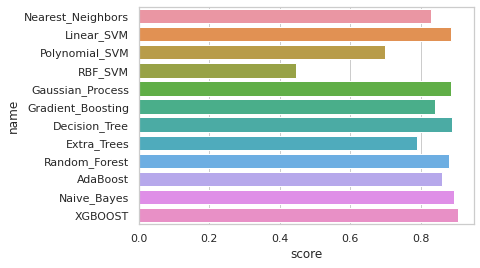

In [171]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)